# Query of Dot 311 

In [1]:
#Perform a basic statistical analysis of the time DOT 311 (table is called dot_311) 
#complaints are open (subtract closed date from created date). Connect to the database 
#to get the data and do the analysis. Submit the code through Github and type up your 
#results in your PR

In [2]:
#Host: training.c1erymiua9dx.us-east-1.rds.amazonaws.com
#Port: 5432
#Database: training
#Username: dot_student
#Password: qgis

In [3]:
#Very helpful when dealing with Timedeltas:
#http://www.datasciencebytes.com/bytes/2015/05/16/pandas-timedelta-histograms-unit-conversion-and-overflow-danger/

In [4]:
#For set up and Query:
#http://pythonhosted.org/pg8000/quickstart.html
#http://www.datasciencebytes.com/bytes/2015/05/16/pandas-timedelta-histograms-unit-conversion-and-overflow-danger/

In [5]:
import pg8000
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
conn = pg8000.connect(user='dot_student', host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', port=5432, database='training', password='qgis')

In [7]:
df = pd.read_sql("select * from noise_311", conn)

In [8]:
df

,b'unique_key',b'created_date',b'closed_date',b'agency',b'agency_name',b'complaint_type',b'descriptor',b'location_type',b'incident_zip',b'incident_address',...,b'bridge_highway_name',b'bridge_highway_direction',b'road_ramp',b'bridge_highway_segment',b'garage_lot_name',b'ferry_direction',b'ferry_terminal_name',b'latitude',b'longitude',b'location'
0,28792167,2014-08-31 23:59:00,2014-09-01 03:52:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,200 KINGSLAND AVENUE,...,None,None,None,None,None,None,None,40.723888,-73.941349,"(40.723888303549415, -73.94134888943505)"
1,28789088,2014-08-31 23:56:00,2014-09-01 06:17:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11234,FLATLANDS AVENUE,...,None,None,None,None,None,None,None,40.619489,-73.938051,"(40.61948901090983, -73.93805104516916)"
2,28791854,2014-08-31 23:54:00,2014-09-01 01:29:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10002,161 LUDLOW STREET,...,None,None,None,None,None,None,None,40.721410,-73.987694,"(40.72141034382407, -73.98769444021134)"
3,28789936,2014-08-31 23:52:00,2014-09-01 02:53:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,624 WEST 182 STREET,...,None,None,None,None,None,None,None,40.850167,-73.933972,"(40.85016671877659, -73.93397220795968)"
4,28789931,2014-08-31 23:47:00,2014-09-01 01:06:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11217,525 DEAN STREET,...,None,None,None,None,None,None,None,40.681208,-73.972775,"(40.68120794066068, -73.97277535440028)"
5,28790974,2014-08-31 23:46:00,2014-09-01 02:52:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10034,None,...,None,None,None,None,None,None,None,40.867276,-73.919215,"(40.867276028886835, -73.9192147239671)"
6,28788883,2014-08-31 23:43:00,2014-09-01 00:47:00,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10463,3815 PUTNAM AVENUE WEST,...,None,None,None,None,None,None,None,40.884763,-73.898735,"(40.88476278238543, -73.89873506548597)"
7,28791627,2014-08-31 23:42:00,2014-09-01 04:00:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10009,16 FIRST AVENUE,...,None,None,None,None,None,None,None,40.723494,-73.988253,"(40.72349367369547, -73.98825325266078)"
8,28791754,2014-08-31 23:42:00,2014-09-01 04:30:00,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,10473,None,...,None,None,None,None,None,None,None,40.820151,-73.872470,"(40.820151079334636, -73.87246956983442)"
9,28791202,2014-08-31 23:40:00,2014-09-01 03:05:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11216,665 FRANKLIN AVENUE,...,None,None,None,None,None,None,None,40.675702,-73.955913,"(40.675702188086944, -73.95591276456229)"


In [15]:
df['open'] = df[b'closed_date'] - df[b'created_date']

In [16]:
df['open'].describe()

count                     37615
mean     0 days 07:44:22.532500
std      1 days 12:06:09.012799
min             0 days 00:01:00
25%             0 days 00:54:00
50%             0 days 02:02:00
75%             0 days 04:15:00
max            48 days 05:45:00
Name: open, dtype: object

In [17]:
df.index = df['open']

In [ ]:
df_delta = df[df['open']

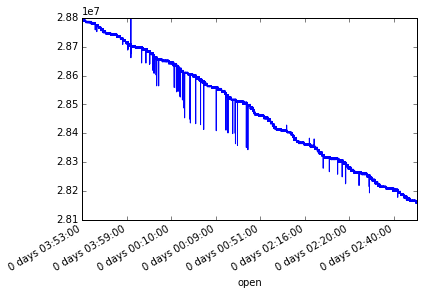

In [22]:
df[b'unique_key'].plot()

In [16]:
for x in results:
    print(x[3])

unique_key
created_date
closed_date
agency
agency_name
complaint_type
descriptor
location_type
incident_zip
incident_address
street_name
cross_street_1
cross_street_2
intersection_street_1
intersection_street_2
address_type
city
landmark
facility_type
status
due_date
resolution_description
resolution_action_updated_date
community_board
borough
x_coordinate
y_coordinate
park_facility_name
park_borough
school_name
school_number
school_region
school_code
school_phone_number
school_address
school_city
school_state
school_zip
school_not_found
school_or_citywide_complaint
vehicle_type
taxi_company_borough
taxi_pick_up_location
bridge_highway_name
bridge_highway_direction
road_ramp
bridge_highway_segment
garage_lot_name
ferry_direction
ferry_terminal_name
latitude
longitude
location


In [17]:
#Prepping the data for the list
results_list = []
for y in results:
    results_list.append(y)

In [18]:
results_list

[['training',
  'public',
  'noise_311',
  'unique_key',
  1,
  None,
  'YES',
  'bigint',
  None,
  None,
  64,
  2,
  0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'training',
  'pg_catalog',
  'int8',
  None,
  None,
  None,
  None,
  '1',
  'NO',
  'NO',
  None,
  None,
  None,
  None,
  None,
  None,
  'NEVER',
  None,
  'YES'],
 ['training',
  'public',
  'noise_311',
  'created_date',
  2,
  None,
  'YES',
  'timestamp without time zone',
  None,
  None,
  None,
  None,
  None,
  6,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'training',
  'pg_catalog',
  'timestamp',
  None,
  None,
  None,
  None,
  '2',
  'NO',
  'NO',
  None,
  None,
  None,
  None,
  None,
  None,
  'NEVER',
  None,
  'YES'],
 ['training',
  'public',
  'noise_311',
  'closed_date',
  3,
  None,
  'YES',
  'timestamp without time zone',
  None,
  None,
  None,
  None,
  None,
  6,
  None,
  None,
  None,
  N

In [12]:
#Creating the dataframe
df = pd.DataFrame(results_list)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 44 columns):
0     53 non-null object
1     53 non-null object
2     53 non-null object
3     53 non-null object
4     53 non-null int64
5     0 non-null object
6     53 non-null object
7     53 non-null object
8     0 non-null object
9     46 non-null float64
10    1 non-null float64
11    5 non-null float64
12    1 non-null float64
13    2 non-null float64
14    0 non-null object
15    0 non-null object
16    0 non-null object
17    0 non-null object
18    0 non-null object
19    0 non-null object
20    0 non-null object
21    0 non-null object
22    0 non-null object
23    0 non-null object
24    0 non-null object
25    53 non-null object
26    53 non-null object
27    53 non-null object
28    0 non-null object
29    0 non-null object
30    0 non-null object
31    0 non-null object
32    53 non-null object
33    53 non-null object
34    53 non-null object
35    0 non-null object
36    0 non-nul

In [14]:
#Renaming the columns
df.columns = ['Open', 'Closed']

ValueError: Length mismatch: Expected axis has 44 elements, new values have 2 elements

In [15]:
df['Difference'] = df['Closed'] - df['Open']

KeyError: 'Closed'

In [135]:
df_delta = df[df['Difference'] >= pd.Timedelta(seconds=1)].dropna()

In [113]:
df.index = df['Difference']

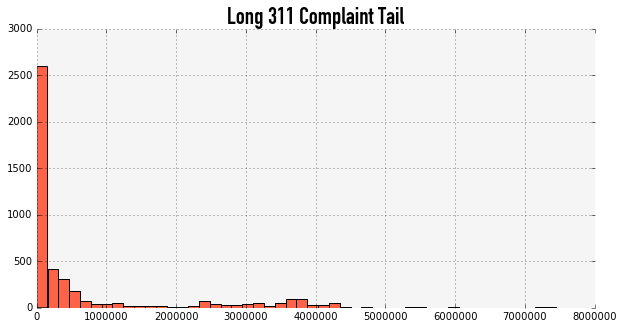

In [152]:
csfont = {'fontname':'DIN Condensed'}

fig, ax = plt.subplots(figsize =(10,5), facecolor='white')


(df_delta['Difference'] / pd.Timedelta(seconds=1)).hist(bins=50, color='tomato', ax=ax)

ax.set_axis_bgcolor("WhiteSmoke")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Long 311 Complaint Tail", **csfont, fontsize=24)


In [ ]:
#Very helpful when dealing with Timedeltas:
#http://www.datasciencebytes.com/bytes/2015/05/16/pandas-timedelta-histograms-unit-conversion-and-overflow-danger/